# **Mobile Price Range Pridiction**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
import scipy.stats as scp
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset
data = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [ ]:
# creating a copy of data
df = data.copy()

In [ ]:
# checking first 5 row
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# checking some random rows
df.sample(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1307,831,0,1.7,1,7,1,26,0.7,177,5,...,511,621,1704,6,5,20,1,1,1,0
349,635,1,0.5,1,2,0,42,0.4,149,3,...,300,1059,2973,12,5,18,0,0,1,2
915,1265,0,0.6,1,4,1,49,0.5,90,1,...,275,687,1518,16,11,8,1,0,1,1


In [ ]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


In [ ]:
# descriptive summary of data
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# checking shape  of dataset
df.shape

(2000, 21)

In [ ]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Preprocesing the data**

**Null values**

In [ ]:
# checking null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Duplicate values**

In [ ]:
#checking duplicate data
df.duplicated().sum()

0

There's no null and duplicate values. 

In [ ]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
print(categorical_columns)

['price_range', 'dual_sim', 'four_g', 'blue', 'touch_screen', 'wifi', 'three_g']


**Checking outliers**

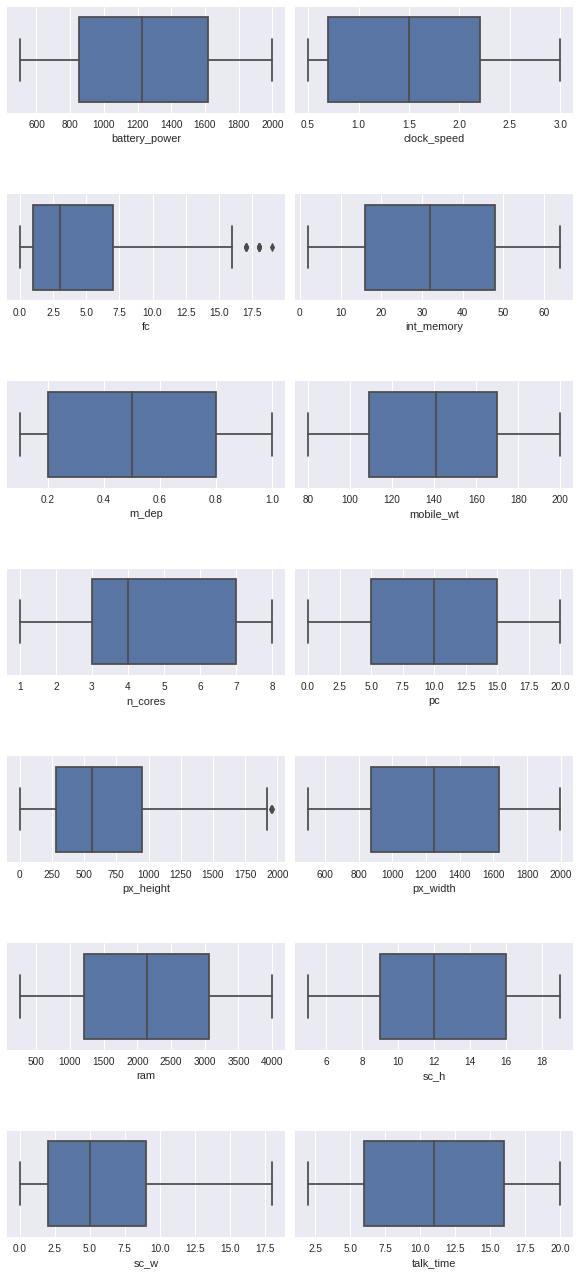

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 2, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

There seems to be no outliers.